# Pneumonia Diagnosis

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd 

## Explore the dataset 

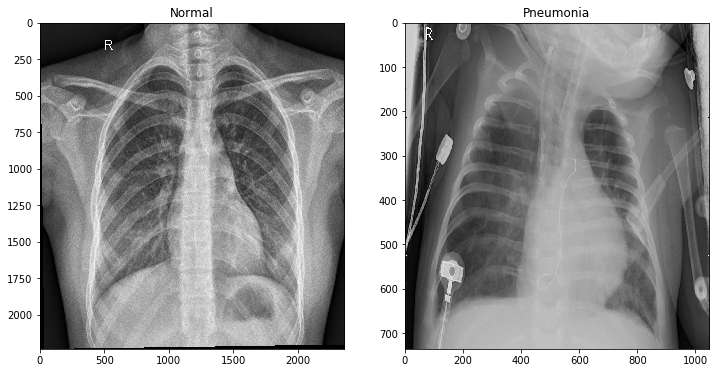

In [2]:
img_normal = plt.imread("data/train/NORMAL/NORMAL2-IM-0927-0001.jpeg")
img_pneumonia = plt.imread("data/train/PNEUMONIA/person63_bacteria_306.jpeg")

fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(img_normal, cmap="gray", aspect="auto")
ax[0].title.set_text('Normal')

ax[1].imshow(img_pneumonia, cmap="gray", aspect="auto")
ax[1].title.set_text('Pneumonia')

plt.show()

In [3]:
img_normal.shape, img_pneumonia.shape

((2234, 2359), (736, 1048))

In [4]:
rescale = 1./255
batch_size = 256
target_size = (224, 224)

train_datagen = ImageDataGenerator(
        rescale=rescale,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=rescale)
test_datagen = ImageDataGenerator(rescale=rescale)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=True)

validation_generator = valid_datagen.flow_from_directory(
        'data/val',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
# we need to recompile the model for these modifications to take effect
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=["acc"])

In [7]:
steps_per_epoch = train_generator.samples / train_generator.batch_size

validation_steps = validation_generator.samples / validation_generator.batch_size 

history = model.fit_generator(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=validation_steps)

Epoch 1/30
 1/20 [>.............................] - ETA: 20:39 - loss: 0.8804 - acc: 0.2148

KeyboardInterrupt: 